# **D208 Predictive Modeling** | PA Task 1 | FILE 3
### Churn Data Set

In [1]:
import sys
print(sys.version)

3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot 
from itertools import product

In [3]:
df= pd.read_csv('prepared_dataset_churn_D208.csv')
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_Fiber Optic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


In [4]:
df.rename(columns={'InternetService_Fiber Optic' : 'InternetService_FiberOptic'}, inplace=True)

In [5]:
df.head()

,Population,Age,Income,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,InternetService_DSL,InternetService_FiberOptic
0,38,68,28561.99,0,7.978323,1,0,1,1,1,0,1,1,0,1,6.795513,172.455519,904.536110,0,1
1,10446,27,21704.77,1,11.699080,1,1,0,1,1,1,1,0,1,1,1.156681,242.632554,800.982766,0,1
2,3735,50,9609.57,0,10.752800,1,1,1,0,1,1,0,0,0,1,15.754144,159.947583,2054.706961,1,0
3,13863,48,18925.23,0,14.913540,0,1,0,0,1,0,1,0,1,0,17.087227,119.956840,2164.579412,1,0
4,11352,83,40074.19,1,8.147417,1,0,1,0,0,0,0,0,1,0,1.670972,149.948316,271.493436,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9991 entries, 0 to 9990
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  9991 non-null   int64  
 1   Age                         9991 non-null   int64  
 2   Income                      9991 non-null   float64
 3   Churn                       9991 non-null   int64  
 4   Outage_sec_perweek          9991 non-null   float64
 5   Yearly_equip_failure        9991 non-null   int64  
 6   Techie                      9991 non-null   int64  
 7   Port_modem                  9991 non-null   int64  
 8   Tablet                      9991 non-null   int64  
 9   Phone                       9991 non-null   int64  
 10  Multiple                    9991 non-null   int64  
 11  OnlineSecurity              9991 non-null   int64  
 12  OnlineBackup                9991 non-null   int64  
 13  StreamingTV                 9991 

## Check for multicollinearity using VIF

In [7]:
#use Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [8]:
def compute_vif(considered_features):
    X = df[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

In [9]:
considered_features = ['Population',
                       'Age', 
                       'Income',
                       'Churn',
                       'Outage_sec_perweek',
                       'Yearly_equip_failure',
                       'Techie',
                       'Port_modem',
                       'Tablet',
                       'Phone',
                       'Multiple',
                       'OnlineSecurity',
                       'OnlineBackup',
                       'StreamingTV',
                       'StreamingMovies',
                       'Tenure',
                       'MonthlyCharge',
                       'InternetService_DSL',
                       'InternetService_FiberOptic']

compute_vif(considered_features).sort_values('VIF', ascending = False)

,Variable,VIF
16,MonthlyCharge,12.310439
14,StreamingMovies,5.531968
13,StreamingTV,3.939856
18,InternetService_FiberOptic,3.452173
10,Multiple,2.729997
17,InternetService_DSL,1.970133
12,OnlineBackup,1.837850
3,Churn,1.713359
15,Tenure,1.403835
11,OnlineSecurity,1.016288


In [10]:
considered_features.remove('MonthlyCharge')
compute_vif(considered_features).sort_values('VIF', ascending = False)

C:\Users\kaili\AppData\Local\Temp\ipykernel_22676\3653474630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
16,InternetService_DSL,1.735322
17,InternetService_FiberOptic,1.718507
3,Churn,1.688949
15,Tenure,1.400407
14,StreamingMovies,1.143757
13,StreamingTV,1.093644
10,Multiple,1.027283
6,Techie,1.007577
12,OnlineBackup,1.007431
8,Tablet,1.002248


### The feature "MonthlyCharge" has VIF > 10

# INITIAL MODEL

In [15]:
model_initial = ols("Bandwidth_GB_Year ~ MonthlyCharge + Population + Age + Income + Churn + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

In [16]:
model_initial.params

Intercept                     1.359250e+01
MonthlyCharge                 3.272196e+00
Population                   -3.875838e-05
Age                          -3.359748e+00
Income                        2.482354e-07
Churn                         1.678670e+00
Outage_sec_perweek            3.755060e-01
Yearly_equip_failure          4.325477e-01
Techie                       -1.330278e+00
Port_modem                    1.828037e+00
Tablet                       -4.262595e-01
Phone                        -1.906635e+00
Multiple                     -3.745406e+01
OnlineSecurity                6.928261e+01
OnlineBackup                  2.006130e+01
StreamingTV                   8.990295e+01
StreamingMovies               4.104283e+01
Tenure                        8.190071e+01
InternetService_DSL           3.703950e+02
InternetService_FiberOptic   -1.078163e+02
dtype: float64

In [17]:
mse = model_initial.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  6419.244287636466
rse:  80.12018651773388


In [18]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.906e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:12:39   Log-Likelihood:                -57962.
No. Observations:                9991   AIC:                         1.160e+05
Df Residuals:                    9971   BIC:                         1.161e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     13.5925      7.451      1.824      0.068      -1.012      28.197
MonthlyCharge                  3.2722      0.066     49.955      0.000       3.144       3.401
Population                 -3.876e-05   5.59e-05     -0.693      0.488      -0.000    7.09e-05
Age                           -3.3597      0.039    -86.693      0.000      -3.436      -3.284
Income                      2.482e-07   2.88e-05      0.009      0.993   -5.62e-05    5.67e-05
Churn                          1.6787      2.377      0.706      0.480      -2.980       6.337
Outage_sec_perweek             0.3755      0.269      1.394      0.163      -0.153       0.904
Yearly_equip_failure           0.4325      1.267      0.342      0.733      -2.050       2.915
Techie                        -1.3303      2.153     -0.618      0.537      -5.551       2.891
Port_modem                     1.8280      1.605      1.139      0.255      -1.318       4.974
Tablet                        -0.4263      1.753     -0.243      0.808      -3.863       3.011
Phone                         -1.9066      2.759     -0.691      0.489      -7.314       3.501
Multiple                     -37.4541      2.657    -14.097      0.000     -42.662     -32.246
OnlineSecurity                69.2826      1.686     41.095      0.000      65.978      72.587
OnlineBackup                  20.0613      2.184      9.186      0.000      15.780      24.342
StreamingTV                   89.9030      3.182     28.250      0.000      83.665      96.141
StreamingMovies               41.0428      3.771     10.882      0.000      33.650      48.436
Tenure                        81.9007      0.036   2280.237      0.000      81.830      81.971
InternetService_DSL          370.3950      2.365    156.628      0.000     365.759     375.030
InternetService_FiberOptic  -107.8163      3.000    -35.942      0.000    -113.696    -101.936
==============================================================================
Omnibus:                     1037.448   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1455.422
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       3.897   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# REDUCED MODEL
- remove "MonthlyCharge due to VIF > 10
- then iteratively remove variables with p-value > 0.05

In [24]:
model_reduced1 = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Yearly_equip_failure + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

In [25]:
model_reduced1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.297e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:14:59   Log-Likelihood:                -59078.
No. Observations:                9991   AIC:                         1.182e+05
Df Residuals:                    9972   BIC:                         1.183e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    277.6614      5.871     47.295      0.000     266.153     289.169
Population                 -5.194e-05   6.25e-05     -0.831      0.406      -0.000    7.06e-05
Age                           -3.3205      0.043    -76.647      0.000      -3.405      -3.236
Income                       2.58e-05   3.22e-05      0.802      0.423   -3.73e-05    8.89e-05
Churn                         15.8500      2.638      6.007      0.000      10.678      21.022
Outage_sec_perweek             0.4125      0.301      1.369      0.171      -0.178       1.003
Yearly_equip_failure           0.0322      1.416      0.023      0.982      -2.744       2.808
Techie                         0.7132      2.407      0.296      0.767      -4.005       5.432
Port_modem                     1.1149      1.794      0.621      0.534      -2.402       4.632
Tablet                        -1.6183      1.960     -0.826      0.409      -5.461       2.224
Phone                         -5.6432      3.083     -1.830      0.067     -11.687       0.401
Multiple                      67.3696      1.822     36.968      0.000      63.797      70.942
OnlineSecurity                79.2983      1.872     42.368      0.000      75.630      82.967
OnlineBackup                  93.3992      1.808     51.660      0.000      89.855      96.943
StreamingTV                  225.0261      1.875    120.033      0.000     221.351     228.701
StreamingMovies              208.8447      1.917    108.919      0.000     205.086     212.603
Tenure                        81.9894      0.040   2044.085      0.000      81.911      82.068
InternetService_DSL          411.1790      2.482    165.696      0.000     406.315     416.043
InternetService_FiberOptic    -1.6224      2.366     -0.686      0.493      -6.261       3.016
==============================================================================
Omnibus:                      606.473   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.239
Skew:                           0.619   Prob(JB):                    2.70e-159
Kurtosis:                       3.469   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### remove highest p-value first: 

In [27]:
# "Yearly_equip_failure" p = 0.982

model_reduced2 = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Techie + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

model_reduced2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.491e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:16:50   Log-Likelihood:                -59078.
No. Observations:                9991   AIC:                         1.182e+05
Df Residuals:                    9973   BIC:                         1.183e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    277.6742      5.844     47.518      0.000     266.220     289.129
Population                 -5.195e-05   6.25e-05     -0.831      0.406      -0.000    7.06e-05
Age                           -3.3205      0.043    -76.653      0.000      -3.405      -3.236
Income                       2.58e-05   3.22e-05      0.802      0.423   -3.73e-05    8.89e-05
Churn                         15.8492      2.638      6.008      0.000      10.678      21.020
Outage_sec_perweek             0.4125      0.301      1.369      0.171      -0.178       1.003
Techie                         0.7128      2.407      0.296      0.767      -4.005       5.431
Port_modem                     1.1151      1.794      0.622      0.534      -2.402       4.632
Tablet                        -1.6181      1.960     -0.826      0.409      -5.460       2.224
Phone                         -5.6439      3.083     -1.831      0.067     -11.687       0.399
Multiple                      67.3697      1.822     36.971      0.000      63.798      70.942
OnlineSecurity                79.2977      1.871     42.375      0.000      75.629      82.966
OnlineBackup                  93.3988      1.808     51.665      0.000      89.855      96.942
StreamingTV                  225.0264      1.875    120.041      0.000     221.352     228.701
StreamingMovies              208.8447      1.917    108.925      0.000     205.086     212.603
Tenure                        81.9894      0.040   2044.196      0.000      81.911      82.068
InternetService_DSL          411.1793      2.481    165.706      0.000     406.315     416.043
InternetService_FiberOptic    -1.6225      2.366     -0.686      0.493      -6.261       3.016
==============================================================================
Omnibus:                      606.467   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.229
Skew:                           0.619   Prob(JB):                    2.71e-159
Kurtosis:                       3.469   Cond. No.                     3.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# now, remove "Techie" p = 0.767

model_reduced3 = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Port_modem + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

model_reduced3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.710e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:17:40   Log-Likelihood:                -59078.
No. Observations:                9991   AIC:                         1.182e+05
Df Residuals:                    9974   BIC:                         1.183e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    277.7971      5.829     47.662      0.000     266.372     289.222
Population                 -5.213e-05   6.25e-05     -0.834      0.404      -0.000    7.04e-05
Age                           -3.3206      0.043    -76.661      0.000      -3.406      -3.236
Income                      2.582e-05   3.22e-05      0.802      0.422   -3.73e-05    8.89e-05
Churn                         15.9122      2.629      6.052      0.000      10.758      21.066
Outage_sec_perweek             0.4120      0.301      1.368      0.171      -0.178       1.003
Port_modem                     1.1072      1.794      0.617      0.537      -2.409       4.623
Tablet                        -1.6110      1.960     -0.822      0.411      -5.453       2.231
Phone                         -5.6447      3.083     -1.831      0.067     -11.688       0.398
Multiple                      67.3602      1.822     36.973      0.000      63.789      70.932
OnlineSecurity                79.2902      1.871     42.377      0.000      75.623      82.958
OnlineBackup                  93.3983      1.808     51.667      0.000      89.855      96.942
StreamingTV                  225.0149      1.874    120.066      0.000     221.341     228.688
StreamingMovies              208.8266      1.916    108.976      0.000     205.070     212.583
Tenure                        81.9898      0.040   2045.508      0.000      81.911      82.068
InternetService_DSL          411.1779      2.481    165.713      0.000     406.314     416.042
InternetService_FiberOptic    -1.6186      2.366     -0.684      0.494      -6.257       3.020
==============================================================================
Omnibus:                      606.496   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.292
Skew:                           0.619   Prob(JB):                    2.62e-159
Kurtosis:                       3.469   Cond. No.                     3.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# now, remove "Port_modem" p = 0.537

model_reduced4 = ols("Bandwidth_GB_Year ~ Population + Age + Income + Churn + Outage_sec_perweek + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

model_reduced4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.957e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:18:42   Log-Likelihood:                -59079.
No. Observations:                9991   AIC:                         1.182e+05
Df Residuals:                    9975   BIC:                         1.183e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    278.3015      5.771     48.226      0.000     266.990     289.613
Population                 -5.178e-05   6.25e-05     -0.828      0.407      -0.000    7.08e-05
Age                           -3.3205      0.043    -76.661      0.000      -3.405      -3.236
Income                      2.559e-05   3.22e-05      0.795      0.426   -3.75e-05    8.87e-05
Churn                         15.9373      2.629      6.062      0.000      10.784      21.091
Outage_sec_perweek             0.4132      0.301      1.372      0.170      -0.177       1.004
Tablet                        -1.6094      1.960     -0.821      0.412      -5.451       2.232
Phone                         -5.6398      3.083     -1.829      0.067     -11.683       0.403
Multiple                      67.3540      1.822     36.971      0.000      63.783      70.925
OnlineSecurity                79.2940      1.871     42.380      0.000      75.626      82.962
OnlineBackup                  93.3939      1.808     51.667      0.000      89.851      96.937
StreamingTV                  225.0095      1.874    120.068      0.000     221.336     228.683
StreamingMovies              208.8257      1.916    108.979      0.000     205.070     212.582
Tenure                        81.9902      0.040   2045.848      0.000      81.912      82.069
InternetService_DSL          411.1733      2.481    165.717      0.000     406.310     416.037
InternetService_FiberOptic    -1.6165      2.366     -0.683      0.495      -6.254       3.022
==============================================================================
Omnibus:                      606.095   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.668
Skew:                           0.619   Prob(JB):                    3.59e-159
Kurtosis:                       3.468   Cond. No.                     3.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### now, all variables are statistically significant with p-value < 0.05.
### population and income have coeffients basically 0

In [32]:
mse = model_reduced4.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  8023.015882801472
rse:  89.57128938896365


In [31]:
# curious about removing population and income from model due to practical significance

model_reduced5 = ols("Bandwidth_GB_Year ~ Age + Churn + Outage_sec_perweek + Tablet + Phone + Multiple + OnlineSecurity + OnlineBackup + StreamingTV + StreamingMovies + Tenure + InternetService_DSL + InternetService_FiberOptic",
                   data=df).fit()

model_reduced5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.567e+05
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:26:19   Log-Likelihood:                -59079.
No. Observations:                9991   AIC:                         1.182e+05
Df Residuals:                    9977   BIC:                         1.183e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    278.9049      5.588     49.911      0.000     267.951     289.859
Age                           -3.3211      0.043    -76.684      0.000      -3.406      -3.236
Churn                         15.9762      2.629      6.078      0.000      10.824      21.129
Outage_sec_perweek             0.4098      0.301      1.360      0.174      -0.181       1.000
Tablet                        -1.6049      1.960     -0.819      0.413      -5.446       2.237
Phone                         -5.6653      3.083     -1.838      0.066     -11.708       0.377
Multiple                      67.3560      1.822     36.973      0.000      63.785      70.927
OnlineSecurity                79.2630      1.871     42.370      0.000      75.596      82.930
OnlineBackup                  93.3695      1.807     51.659      0.000      89.827      96.912
StreamingTV                  225.0041      1.874    120.075      0.000     221.331     228.677
StreamingMovies              208.8262      1.916    108.984      0.000     205.070     212.582
Tenure                        81.9907      0.040   2046.047      0.000      81.912      82.069
InternetService_DSL          411.1799      2.481    165.737      0.000     406.317     416.043
InternetService_FiberOptic    -1.6368      2.366     -0.692      0.489      -6.274       3.001
==============================================================================
Omnibus:                      606.331   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.033
Skew:                           0.619   Prob(JB):                    2.99e-159
Kurtosis:                       3.468   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
mse = model_reduced5.mse_resid
print('mse: ' , mse)

rse = np.sqrt(mse)
print('rse: ', rse)

mse:  8022.474786520183
rse:  89.56826885968145


# **RESIDUAL PLOTS**

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Population Residuals')

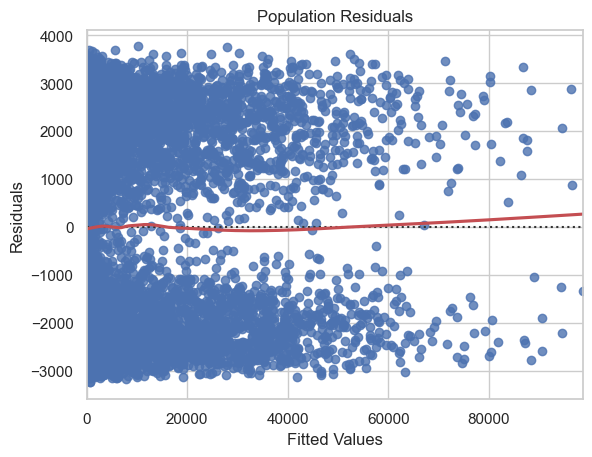

In [35]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Population',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Population Residuals")

Text(0.5, 1.0, 'Age Residuals')

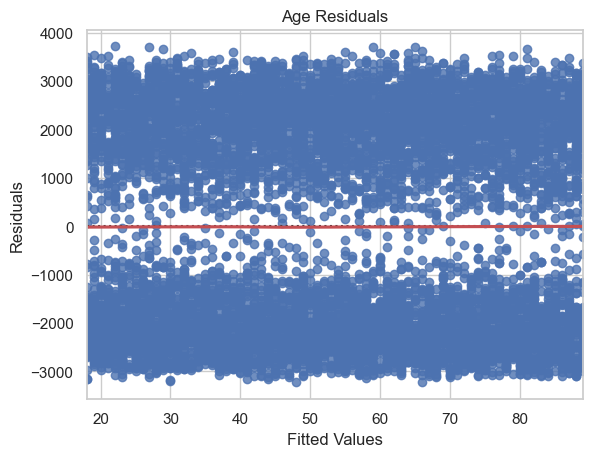

In [36]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Age',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Age Residuals")

Text(0.5, 1.0, 'Income Residuals')

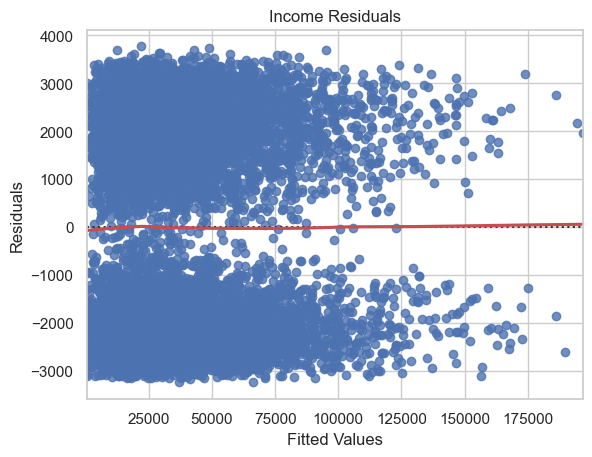

In [37]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Income',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Income Residuals")

C:\Users\kaili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Text(0.5, 1.0, 'Churn Residuals')

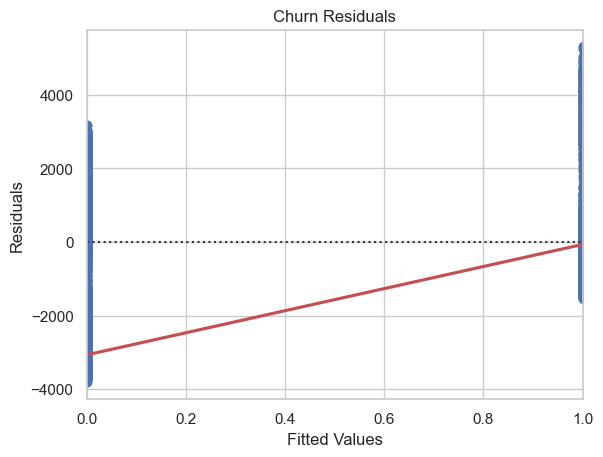

In [38]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Churn',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Churn Residuals")

Text(0.5, 1.0, 'Outage_sec_perweek Residuals')

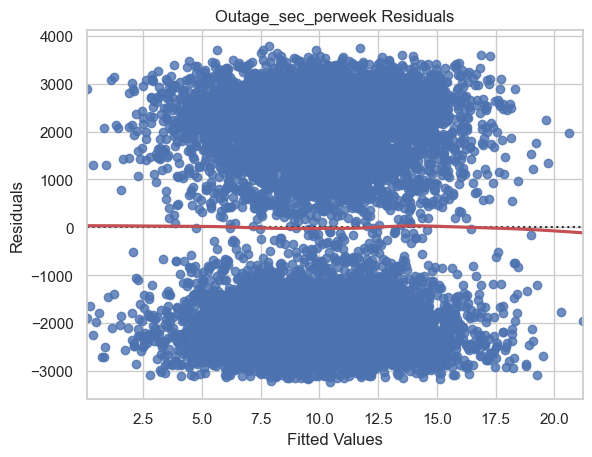

In [39]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Outage_sec_perweek',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Outage_sec_perweek Residuals")

Text(0.5, 1.0, 'Tablet Residuals')

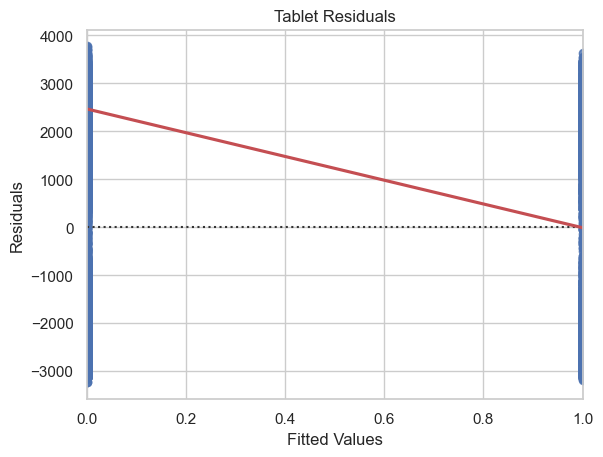

In [40]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Tablet',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Tablet Residuals")

Text(0.5, 1.0, 'Phone Residuals')

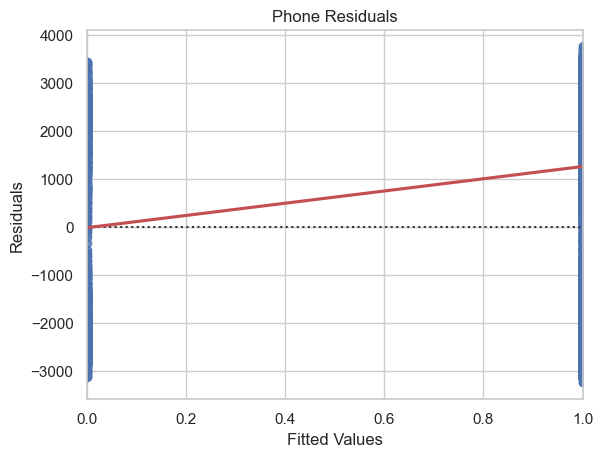

In [41]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Phone',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Phone Residuals")

Text(0.5, 1.0, 'Multiple Residuals')

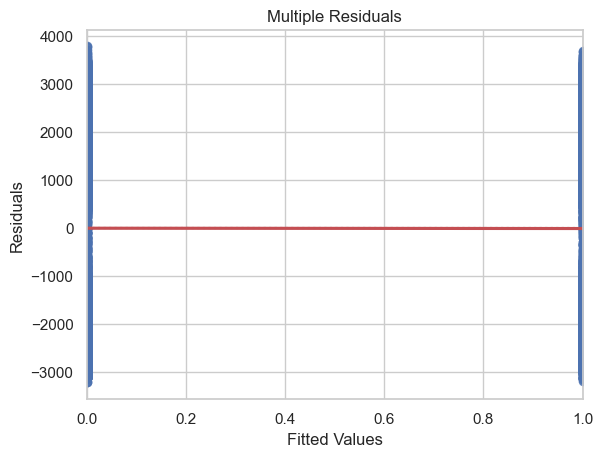

In [42]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Multiple',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Multiple Residuals")

Text(0.5, 1.0, 'OnlineSecurity Residuals')

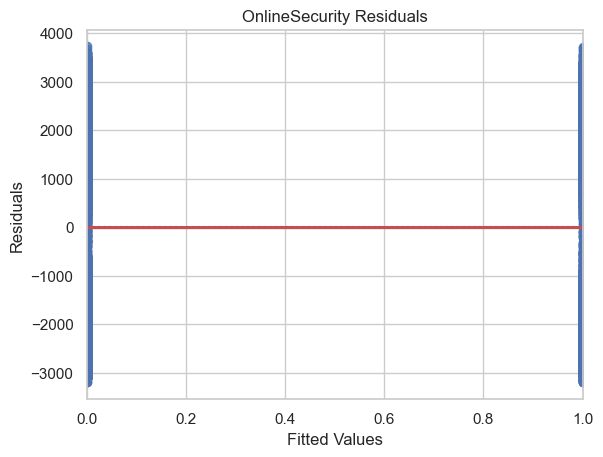

In [43]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'OnlineSecurity',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("OnlineSecurity Residuals")

Text(0.5, 1.0, 'OnlineBackup Residuals')

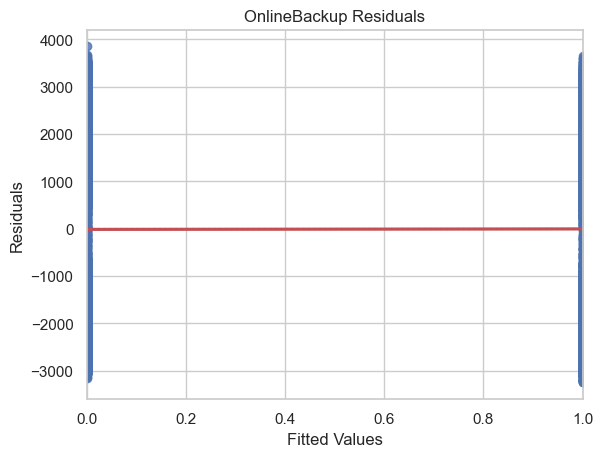

In [44]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'OnlineBackup',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("OnlineBackup Residuals")

Text(0.5, 1.0, 'StreamingTV Residuals')

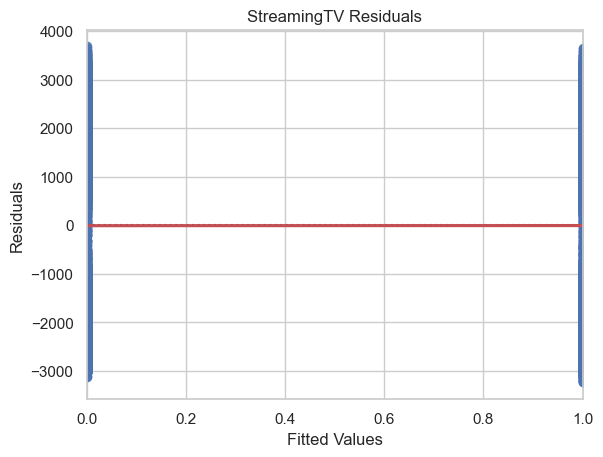

In [45]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'StreamingTV',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("StreamingTV Residuals")

Text(0.5, 1.0, 'StreamingMovies Residuals')

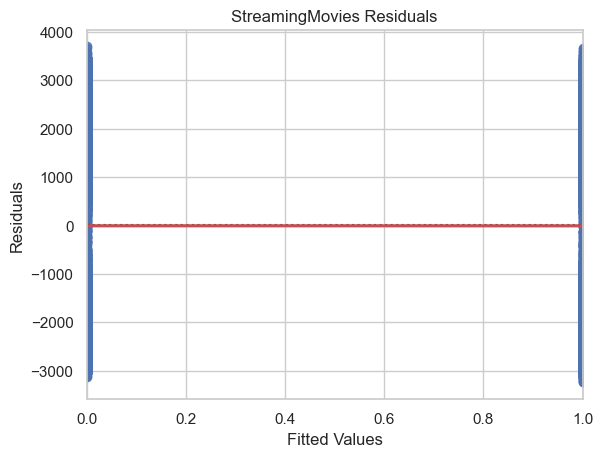

In [46]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'StreamingMovies',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("StreamingMovies Residuals")

Text(0.5, 1.0, 'Tenure Residuals')

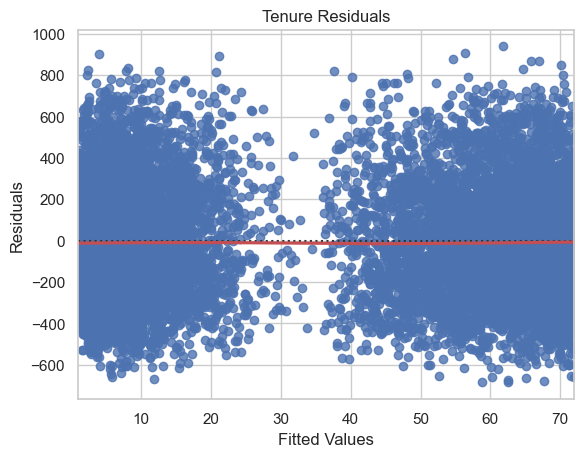

In [47]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'Tenure',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Tenure Residuals")

Text(0.5, 1.0, 'InternetService_DSL Residuals')

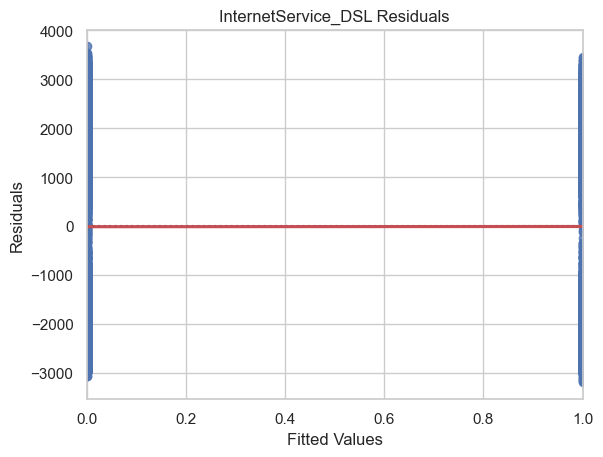

In [48]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'InternetService_DSL',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("InternetService_DSL Residuals")

Text(0.5, 1.0, 'InternetService_FiberOptic Residuals')

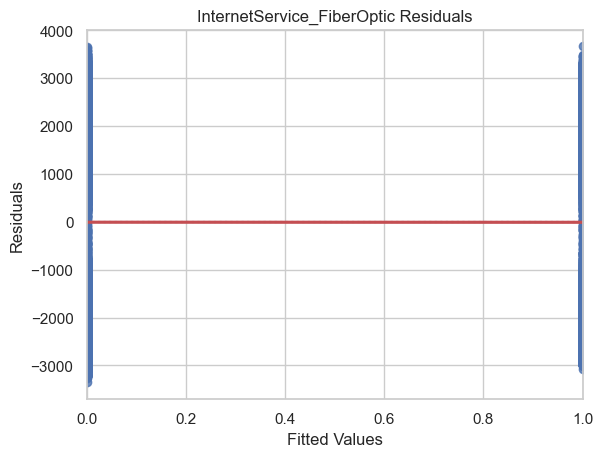

In [49]:
sns.set(style = 'whitegrid')
sns.residplot(x = 'InternetService_FiberOptic',
              y = 'Bandwidth_GB_Year',
             data=df,
             lowess=True,  line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("InternetService_FiberOptic Residuals")